### IMPORT DEPENDENCIES AND DATA

In [5]:
!pip install tensorflow matplotlib tensorflow-datasets ipywidgets

  Using cached promise-2.3-py3-none-any.whl
   ---------------------------------------- 0.0/5.1 MB ? eta -:--:--
    --------------------------------------- 0.1/5.1 MB 3.2 MB/s eta 0:00:02
   -- ------------------------------------- 0.4/5.1 MB 4.4 MB/s eta 0:00:02
   ----- ---------------------------------- 0.7/5.1 MB 5.7 MB/s eta 0:00:01
   ------ --------------------------------- 0.9/5.1 MB 5.1 MB/s eta 0:00:01
   --------- ------------------------------ 1.2/5.1 MB 5.5 MB/s eta 0:00:01
   ------------ --------------------------- 1.6/5.1 MB 6.0 MB/s eta 0:00:01
   -------------- ------------------------- 1.8/5.1 MB 5.8 MB/s eta 0:00:01
   ------------------ --------------------- 2.3/5.1 MB 6.3 MB/s eta 0:00:01
   --------------------- ------------------ 2.7/5.1 MB 6.6 MB/s eta 0:00:01
   ------------------------ --------------- 3.1/5.1 MB 6.8 MB/s eta 0:00:01
   --------------------------- ------------ 3.5/5.1 MB 7.0 MB/s eta 0:00:01
   ------------------------------- -------- 4.0/5.1

In [6]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [7]:
gpus

[]

In [8]:
# Bringing in tensorflow datasets for fashion minst
import tensorflow_datasets as tdfs
from matplotlib import pyplot as plt

In [9]:
ds = tdfs.load('fashion_mnist',split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\kevin\tensorflow_datasets\fashion_mnist\3.0.1.incompleteQRRAZV\fashion_mnist-train.tfrecord…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\kevin\tensorflow_datasets\fashion_mnist\3.0.1.incompleteQRRAZV\fashion_mnist-test.tfrecord*…

Dataset fashion_mnist downloaded and prepared to C:\Users\kevin\tensorflow_datasets\fashion_mnist\3.0.1. Subsequent calls will reuse this data.


In [11]:
ds.as_numpy_iterator().next()['image']

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 18],
        [ 77],
        [227],
        [227],
        [208],
        [210],
        [225],
        [216],
        [ 85],
        [ 32],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 61],
        [100],
        [ 97],
        [ 80],
        [ 57],
        [117],
        [227],
        [238],
        [115],
        [ 49],
        [ 78],
        [106],
        [108],
        [ 71],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 81],
        [105],
        [ 80],
        [ 69],
      

## Visualizing the data and building the dataset

In [12]:
import numpy as np

In [13]:
dataiterator = ds.as_numpy_iterator()

In [18]:
# getting data out of the pipeline
dataiterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  2],
         [127],
         [106],
         [136],
         [102],
         [147],
         [136],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 64],
         [254],
         [255],
         [254],
         [255],
         [255],
         [255],
         [247],
         [161],
         [122],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

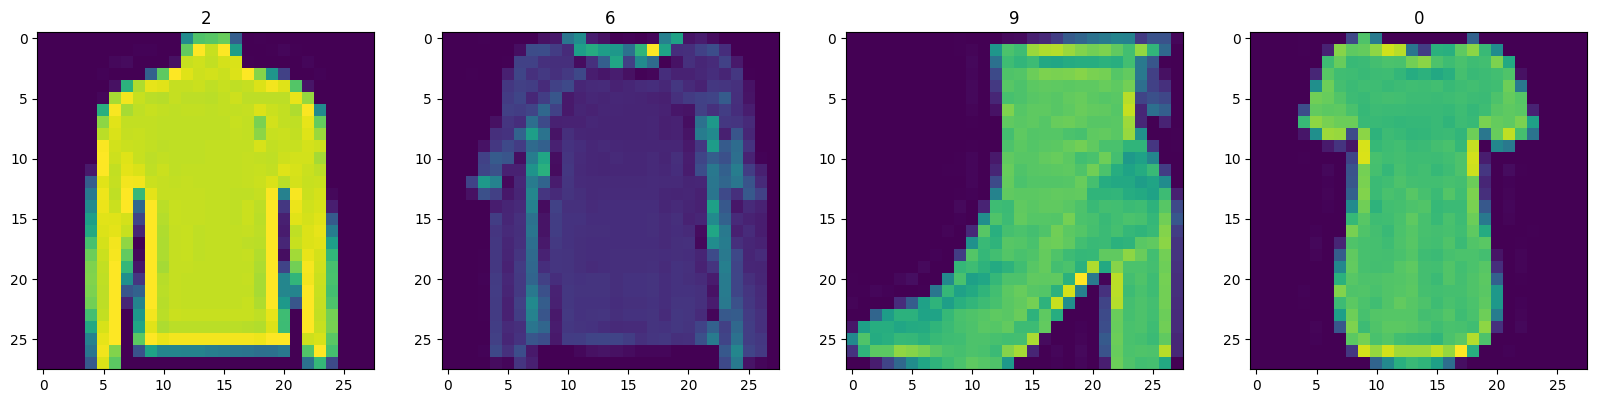

In [22]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx in range(4):
    sample = dataiterator.next()
    ax[idx].imshow(np.squeeze(sample['image']))
    ax[idx].title.set_text(sample['label'])

In [26]:
def scale_images(data):
    image = data['image']
    return image/255

## Building Data Pipeline

In [28]:
ds = tdfs.load('fashion_mnist',split='train')
# running the data set through the scale_images preprocessing step
ds = ds.map(scale_images)
#Cache the dataset for that batch
ds = ds.cache()
#Shuffle it up
ds = ds.shuffle(60000)
# batching into 128 images per sample
ds = ds.batch(128)
#reduces the likelihood of bottlenecking
ds = ds.prefetch(64)

In [31]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

## Building the Neural network

In [35]:
# Importing the model components
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

### Building the Generator Model

In [118]:
def build_generator():
    model = Sequential()

    model.add(Dense(7*7*128, input_dim=128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))

    #upsampling block 
    model.add(UpSampling2D())
    model.add(Conv2D(128,5, padding='same'))
    model.add(LeakyReLU(0.2))

    #upsampling block2
    model.add(UpSampling2D())
    model.add(Conv2D(128,5, padding='same'))
    model.add(LeakyReLU(0.2))

    #Convolutional block1 
    model.add(Conv2D(128,4, padding='same'))
    model.add(LeakyReLU(0.2))

    #Convolutional  block2
    model.add(Conv2D(128,4, padding='same'))
    model.add(LeakyReLU(0.2))

    #Conv Layer to get to one channel
    model.add(Conv2D(1,4,padding='same', activation='sigmoid'))
    
    return model

In [119]:
test_model = build_generator()

In [120]:
test_model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 6272)              809088    
                                                                 
 leaky_re_lu_62 (LeakyReLU)  (None, 6272)              0         
                                                                 
 reshape_11 (Reshape)        (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_19 (UpSampli  (None, 14, 14, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_57 (Conv2D)          (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_63 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                     

In [121]:
generator = build_generator()

In [122]:
generator.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 6272)              809088    
                                                                 
 leaky_re_lu_67 (LeakyReLU)  (None, 6272)              0         
                                                                 
 reshape_12 (Reshape)        (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_21 (UpSampli  (None, 14, 14, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_62 (Conv2D)          (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_68 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                     

In [123]:
img  = generator.predict(np.random.randn(4,128,1))
img.shape

1/1 [==============================] - 0s 176ms/step


(4, 28, 28, 1)

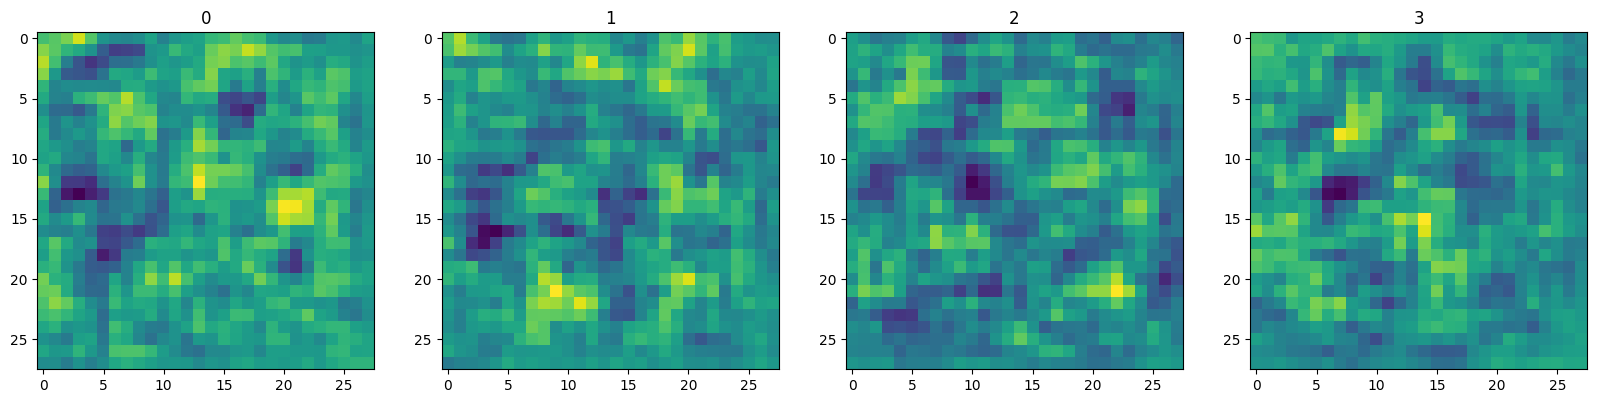

In [124]:


fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(img):
    ax[idx].imshow(np.squeeze(img))
    ax[idx].title.set_text(idx)

## Building the discriminator

In [125]:
def build_discriminator():
    model = Sequential()
    #1st Conv Block
    model.add(Conv2D(32,5,input_shape = (28,28,1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    #2nd Conv Block
    model.add(Conv2D(64,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    #3rd Conv Block
    model.add(Conv2D(128,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    #4th Conv Block
    model.add(Conv2D(256,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    #Flatten then pass to dense layer
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1,activation='sigmoid'))
    return model

In [126]:
discriminator = build_discriminator()

In [127]:
discriminator.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_67 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_72 (LeakyReLU)  (None, 24, 24, 32)        0         
                                                                 
 dropout_18 (Dropout)        (None, 24, 24, 32)        0         
                                                                 
 conv2d_68 (Conv2D)          (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_73 (LeakyReLU)  (None, 20, 20, 64)        0         
                                                                 
 dropout_19 (Dropout)        (None, 20, 20, 64)        0         
                                                                 
 conv2d_69 (Conv2D)          (None, 16, 16, 128)     

In [128]:
img.shape

(28, 28, 1)

In [129]:
discriminator.predict(np.expand_dims(img,0))

1/1 [==============================] - 0s 118ms/step


array([[0.5084162]], dtype=float32)

## Custom Training Loop

Setup Losses and Optimizers

In [130]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [131]:
g_opt = Adam(learning_rate=0.0001)
d_opt = Adam(learning_rate=0.00001)

g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

Build subclassed model

In [133]:
from tensorflow.keras.models import Model 

In [147]:
class FashionGAN(Model):
    def __init__(self, generator, discriminator, *args, **kwargs): 
        super().__init__(*args,**kwargs)
        self.generator =generator
        self.discriminator = discriminator
    def compile(self,g_opt,d_opt,g_loss,d_loss,*args,**kwargs):
        super().compile(*args,**kwargs)
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss


        #Train the discriminator
    def train_step(self,batch):
        real_images = batch
        fake_images = self.generator(tf.random.normal((128,128,1)),training=False)
        #Pass real and fake images to the discriminator
        with tf.GradientTape() as d_tape:
            yhat_real = self.discriminator(real_images,training=True)
            yhat_fake = self.discriminator(fake_images,training=True)
            yhat_realfake = tf.concat([yhat_real,yhat_fake],axis=0)

            #create labels for real and fake images
            y_realfake = tf.concat([tf.zeros_like(yhat_real),tf.ones_like(yhat_fake)],axis=0)
            #Add some noise to the  TRUE outputs 
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real,noise_fake],axis=0)
            #Calculate loss
            total_d_loss = self.d_loss(y_realfake,yhat_realfake)
            #Apply backpropogation
        dgrad = d_tape.gradient(total_d_loss,self.discriminator.trainable_variables)
        self.d_opt.apply_gradients(zip(dgrad,self.discriminator.trainable_variables))

        #Train the generator
        with tf.GradientTape() as g_tape:
            #Generate some new images
            
            gen_images = self.generator(tf.random.normal((128,128,1)), training=True)
            
            #Create the predicted labels 
            predicted_labels = self.discriminator(gen_images,training=False)

            #Calculate_loss - trick to training to fake out the discriminator
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels)

        #Apply backprop
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad,self.generator.trainable_variables))

        return {"d_loss":total_d_loss,"g_loss":total_g_loss}

In [148]:
#Generating an instance of the model
fashiongan = FashionGAN(generator,discriminator)

In [149]:
fashiongan.compile(g_opt,d_opt,g_loss,d_loss)

### Build Callback

In [150]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [151]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('images', f'generated_img_{epoch}_{i}.png'))

#### Train

In [152]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

In [153]:
#Recommended 2000 epochs
hist  = fashiongan.fit(ds,epochs = 20,callbacks=[ModelMonitor()])

Epoch 1/20
469/469 [==============================] - 2566s 5s/step - d_loss: 0.5489 - g_loss: 0.8424
Epoch 2/20
469/469 [==============================] - 2556s 5s/step - d_loss: 0.3614 - g_loss: 3.0390
Epoch 3/20
469/469 [==============================] - 2155s 5s/step - d_loss: 0.2817 - g_loss: 5.2774
Epoch 4/20
469/469 [==============================] - 2159s 5s/step - d_loss: 0.3231 - g_loss: 3.8792
Epoch 5/20
469/469 [==============================] - 2191s 5s/step - d_loss: 0.6082 - g_loss: 0.5128
Epoch 6/20
469/469 [==============================] - 2146s 5s/step - d_loss: 0.2872 - g_loss: 2.4532
Epoch 7/20
469/469 [==============================] - 2152s 5s/step - d_loss: 0.3323 - g_loss: 2.0807
Epoch 8/20
469/469 [==============================] - 2184s 5s/step - d_loss: 0.3511 - g_loss: 0.1169
Epoch 9/20
469/469 [==============================] - 2177s 5s/step - d_loss: 0.3107 - g_loss: 0.0632
Epoch 10/20
469/469 [==============================] - 2177s 5s/step - d_loss: 0.6

In [154]:
hist

In [155]:
hist.params

{'verbose': 1, 'epochs': 20, 'steps': 469}

In [156]:
hist.history

{'d_loss': [0.48067447543144226,
  0.3003409802913666,
  0.2751220762729645,
  0.6373096108436584,
  0.6370881199836731,
  0.26910558342933655,
  0.42513546347618103,
  0.31425169110298157,
  0.3140864968299866,
  0.7024492621421814,
  0.7102823257446289,
  0.7576459050178528,
  0.6941927671432495,
  0.5436758399009705,
  0.7166415452957153,
  0.6939303278923035,
  0.6978651881217957,
  0.6906786561012268,
  0.713474452495575,
  0.2877494990825653],
 'g_loss': [0.7809945940971375,
  5.048521995544434,
  5.459798812866211,
  0.7337366342544556,
  0.5973511934280396,
  2.573451042175293,
  0.23727358877658844,
  0.06084221601486206,
  0.07188009470701218,
  0.6137477159500122,
  0.6447609066963196,
  0.4933815598487854,
  0.587589681148529,
  0.6092061996459961,
  0.59732985496521,
  0.6771486401557922,
  0.6681250333786011,
  0.6413190364837646,
  0.6154848337173462,
  1.4804723262786865]}

Review Performance

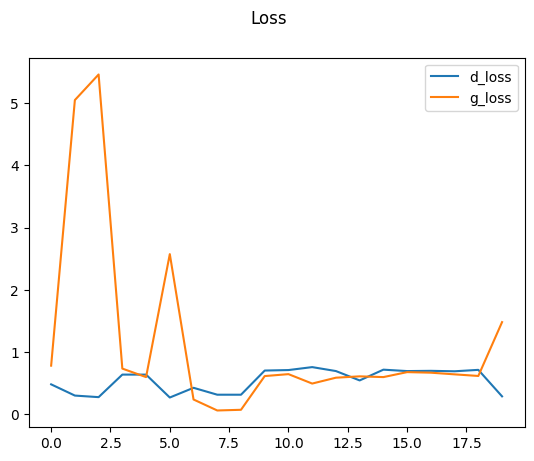

In [158]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'],label='d_loss')
plt.plot(hist.history['g_loss'],label='g_loss')
plt.legend()
plt.show()

## Test out the generator

In [187]:
imgs=  generator.predict(tf.random.normal((16,128,1)))

1/1 [==============================] - 0s 132ms/step


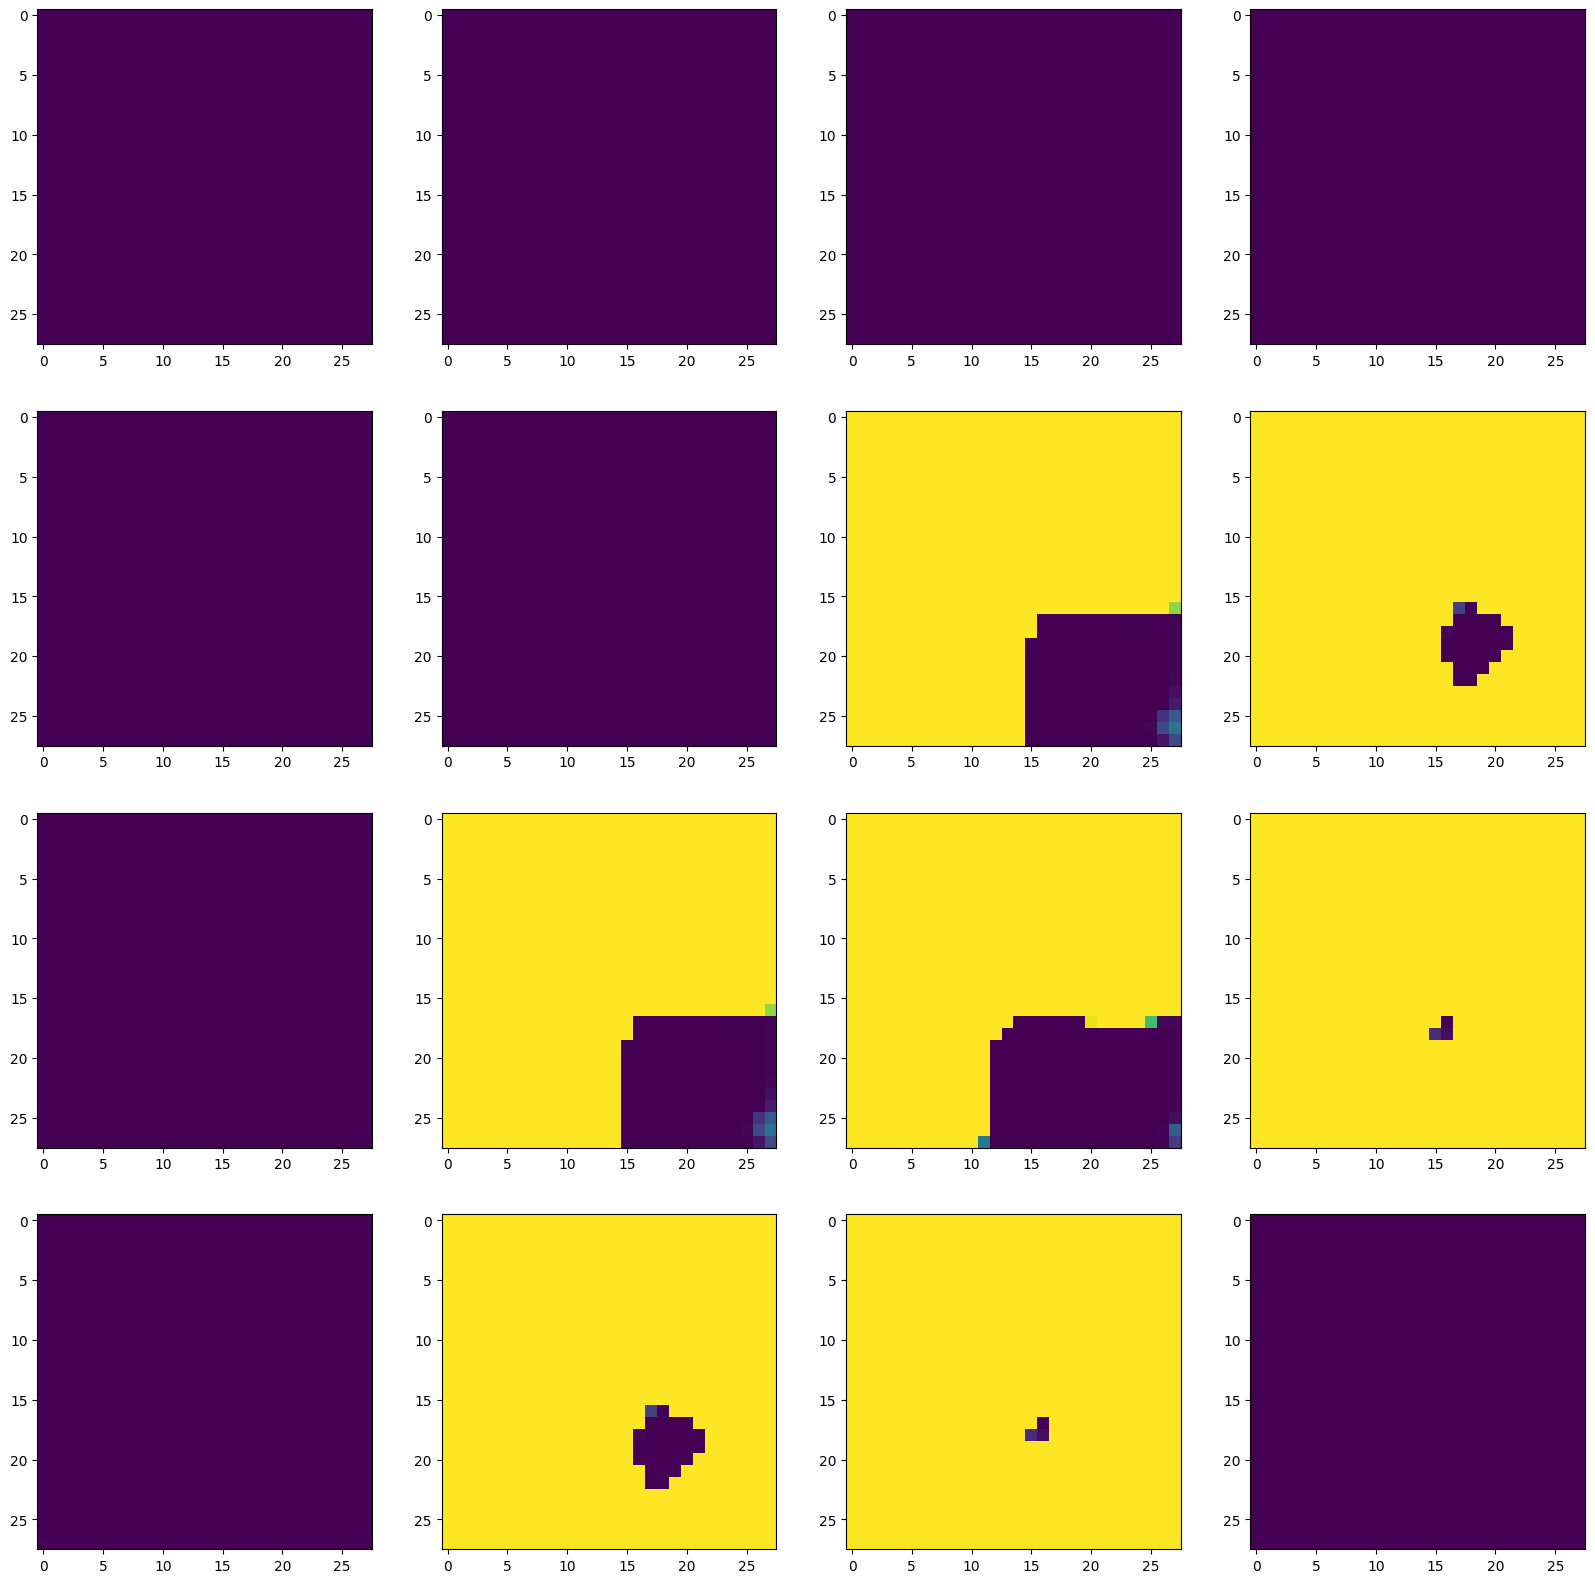

In [188]:
fig,ax = plt.subplots(ncols=4,nrows=4,figsize=(20,20))
for r in range(4):
    for c in range(4):
        ax[r][c].imshow(imgs[(r+1)*(c+1)-1])

## Save the model

In [165]:
generator.save('generator.h5')
discriminator.save('discriminator.h5')